<a href="https://colab.research.google.com/github/mahmoud2571587/Credit-Card/blob/main/credit_card.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import libraries 

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Read Data 

In [5]:
data = pd.read_csv('/content/drive/My Drive/Kaggle /CC GENERAL.csv')

**Explore Data**

In [6]:
data.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


In [7]:
data.shape

(8950, 18)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


there is missing values in (Minimum_payments and credit_limit)

In [10]:
# Explore Missing Data 
data.isnull().sum().sort_values(ascending = False)

MINIMUM_PAYMENTS                    313
CREDIT_LIMIT                          1
TENURE                                0
PURCHASES_FREQUENCY                   0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
ONEOFF_PURCHASES_FREQUENCY            0
PRC_FULL_PAYMENT                      0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
PAYMENTS                              0
CUST_ID                               0
dtype: int64

In [11]:
#check frequency values in MINIMUM_PAYMENTS
data['MINIMUM_PAYMENTS'].value_counts()

299.351881     2
3.197940       1
111.691332     1
129.682608     1
872.760983     1
              ..
1227.773229    1
127.210691     1
6422.472544    1
471.940554     1
189.459157     1
Name: MINIMUM_PAYMENTS, Length: 8636, dtype: int64

In [12]:
#copy data without cust_id beacause it is object not numeric to make visualize
df = data.copy()
df.drop(columns=['CUST_ID'] , axis=1 , inplace=True)

 

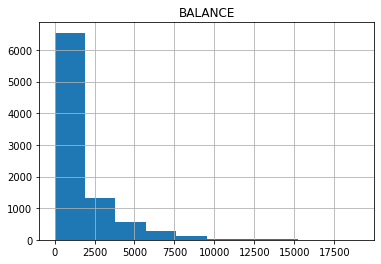

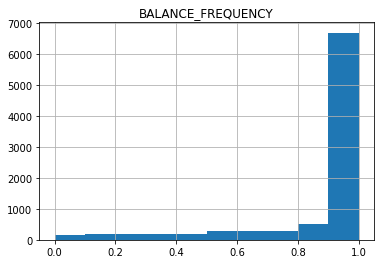

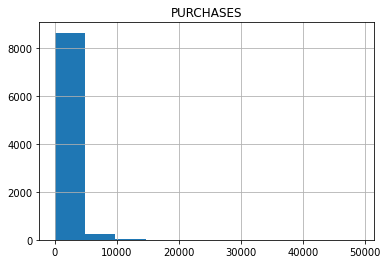

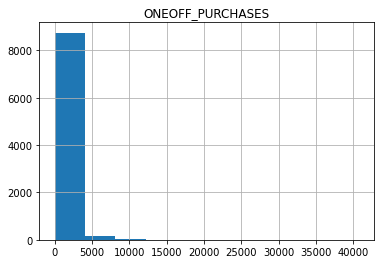

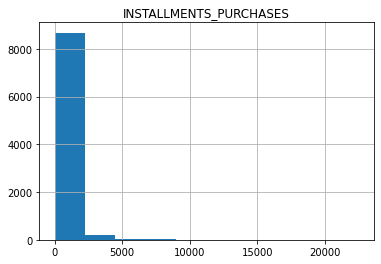

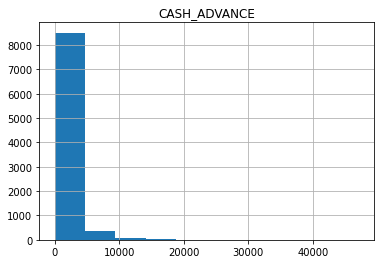

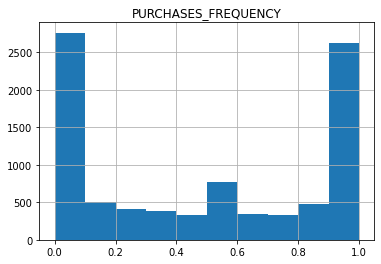

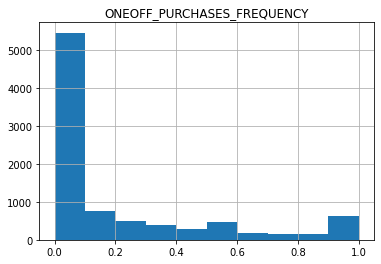

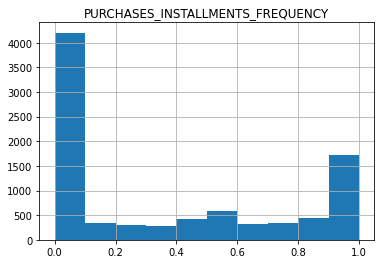

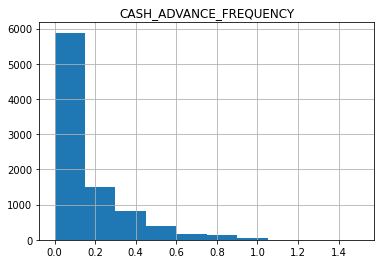

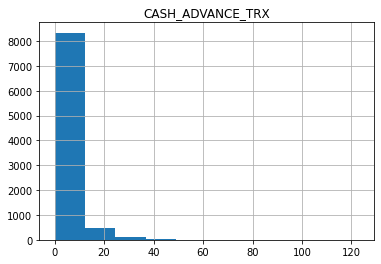

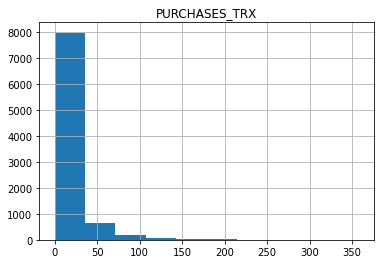

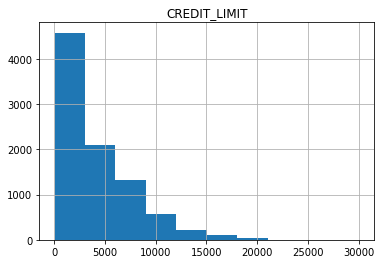

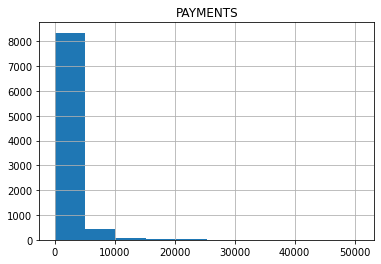

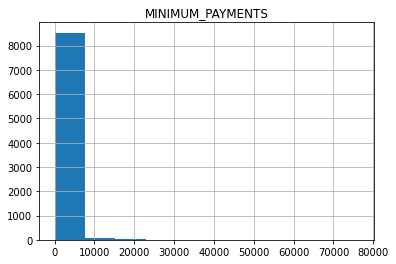

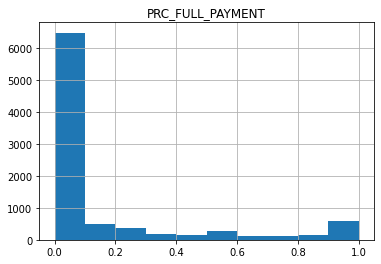

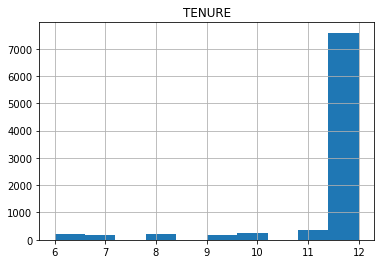

In [13]:
for col in df:
    df[[col]].hist()

**<h4>Explore Outliers</h4>**

there is outlier in (Purchase , one-off-purchase , installments_purchase , Cash_advanced)

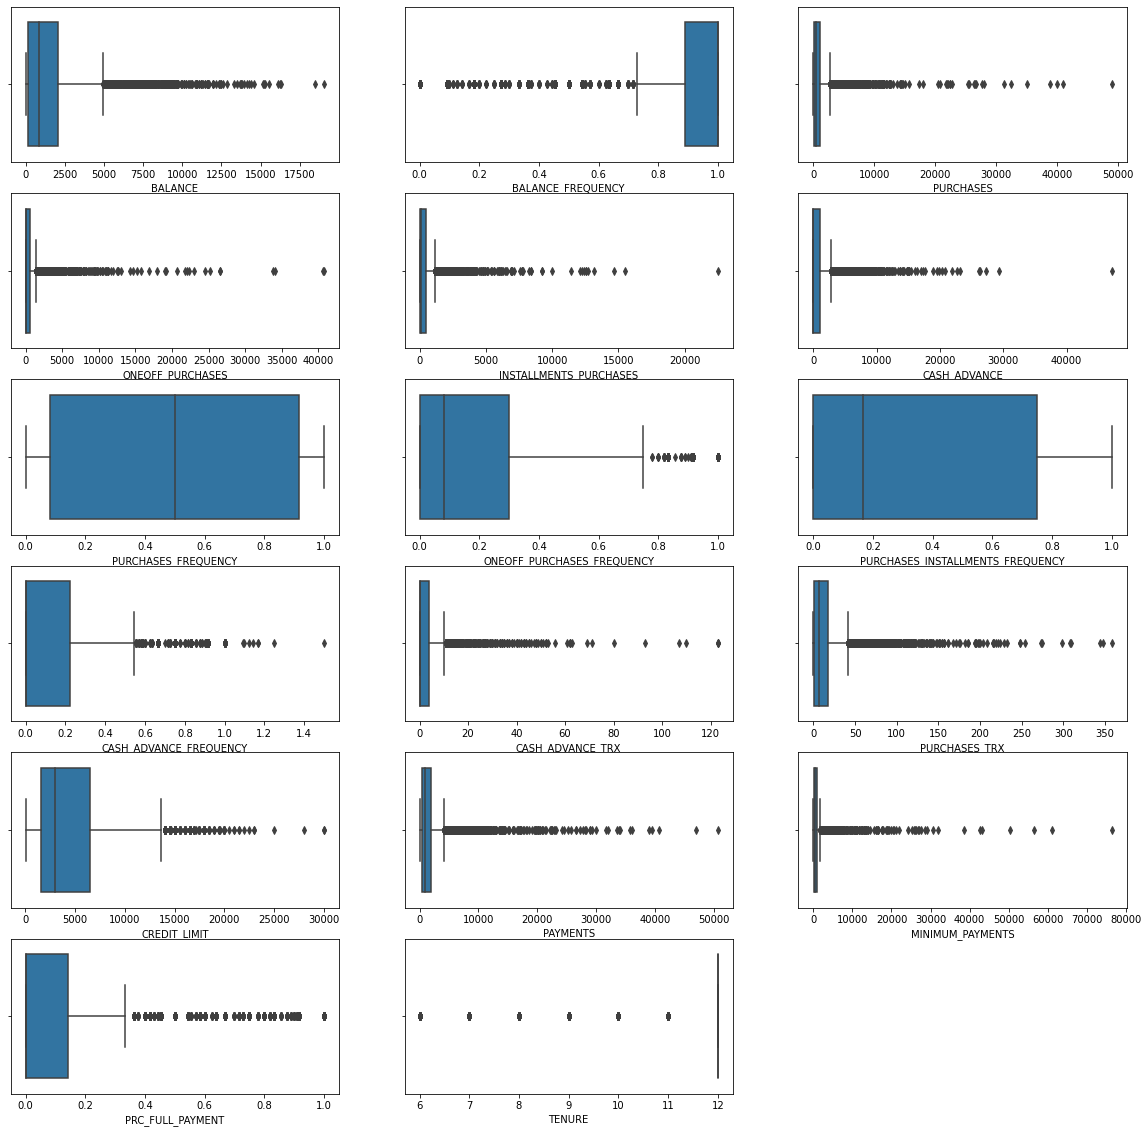

In [14]:
fig = plt.figure(figsize=(20,20))
for col in range(len(df.columns)) :
    fig.add_subplot(6,3,col+1)
    sns.boxplot(x=df.iloc[ : , col])
plt.show()

explore correlation between features 

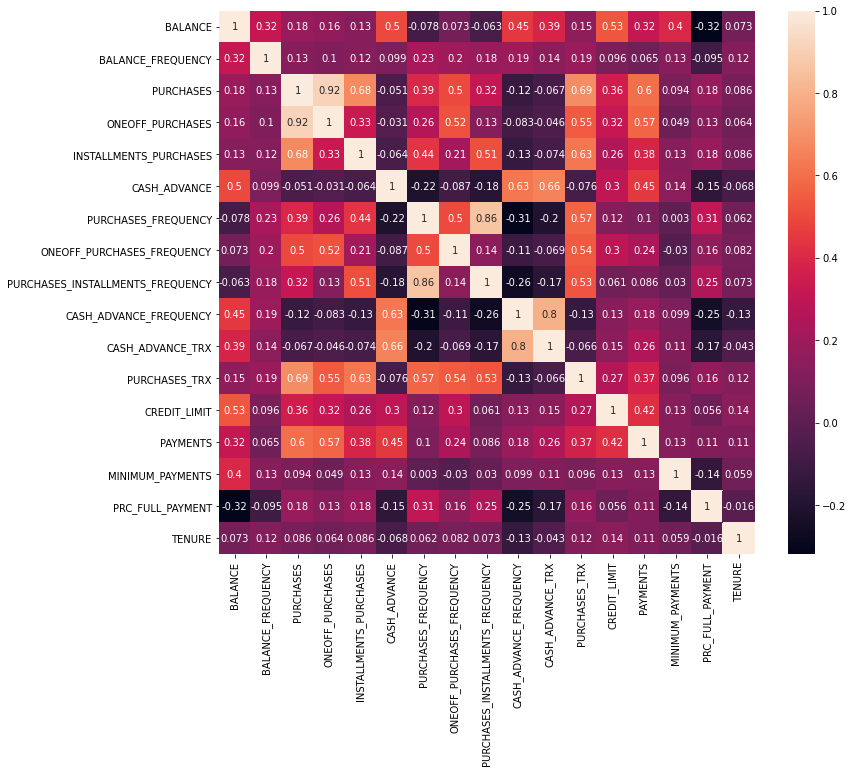

In [15]:
fig = plt.figure(figsize=(12,10))
sns.heatmap(data.corr() , annot=True)

**<h2>preprocessing</h2>**

**Handle missing values**<hr>
there is missing values in (credit_limit , minimum[](http://)_payment)

In [16]:
data['CREDIT_LIMIT']=data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].mean())
data['MINIMUM_PAYMENTS'] = data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].median())

In [17]:
data.isnull().sum().sort_values(ascending = False)

TENURE                              0
PRC_FULL_PAYMENT                    0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
CUST_ID                             0
dtype: int64

**Handle Outliers**

In [18]:
data = data.drop(data[data['PURCHASES'] > 4500].index)
data = data.drop(data[data['ONEOFF_PURCHASES'] > 3000].index)
data = data.drop(data[data['INSTALLMENTS_PURCHASES'] > 1800].index)
data = data.drop(data[data['CASH_ADVANCE'] > 3500].index) 
data = data.drop(data[data['CASH_ADVANCE_FREQUENCY'] > 1.3].index)
data = data.drop(data[data['CASH_ADVANCE_TRX'] > 55].index)
data = data.drop(data[data['PAYMENTS']>3500].index)
data = data.drop(data[data['MINIMUM_PAYMENTS'] > 4000].index)

'''
data.where(data['PURCHASES'] < 4500 , inplace=True)
data.where(data['ONEOFF_PURCHASES'] < 3000 , inplace=True)
data.where(data['INSTALLMENTS_PURCHASES'] < 1800 , inplace= True)
data.where(data['CASH_ADVANCE'] < 3500 ,inplace= True)
data.where(data['CASH_ADVANCE_FREQUENCY'] < 1.3 ,inplace=True)
data.where(data['CASH_ADVANCE_TRX'] < 55 , inplace=True)
data.where(data['PAYMENTS'] < 3500 , inplace=True)
data.where(data['MINIMUM_PAYMENTS'] < 4000 , inplace=True)
'''


"\ndata.where(data['PURCHASES'] < 4500 , inplace=True)\ndata.where(data['ONEOFF_PURCHASES'] < 3000 , inplace=True)\ndata.where(data['INSTALLMENTS_PURCHASES'] < 1800 , inplace= True)\ndata.where(data['CASH_ADVANCE'] < 3500 ,inplace= True)\ndata.where(data['CASH_ADVANCE_FREQUENCY'] < 1.3 ,inplace=True)\ndata.where(data['CASH_ADVANCE_TRX'] < 55 , inplace=True)\ndata.where(data['PAYMENTS'] < 3500 , inplace=True)\ndata.where(data['MINIMUM_PAYMENTS'] < 4000 , inplace=True)\n"

**Feature Engineering**<br>
Drop CUST_ID

In [19]:
data.drop(['CUST_ID'] , axis = 1 , inplace= True)

In [20]:
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.0,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.0,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.0,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.0,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.0,12


In [21]:
data.dtypes

BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [22]:
data.shape

(7038, 17)

In [23]:
data.isnull().sum().sort_values(ascending = False)

TENURE                              0
ONEOFF_PURCHASES_FREQUENCY          0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
PURCHASES_INSTALLMENTS_FREQUENCY    0
PRC_FULL_PAYMENT                    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
BALANCE                             0
dtype: int64

**Feature Scaling**

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#from sklearn.preprocessing import RobustScaler
#sc = RobustScaler()
data = sc.fit_transform(data)

**Build Model**

No handles with labels found to put in legend.


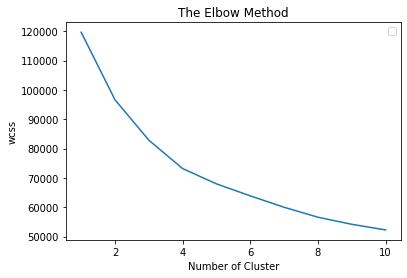

In [25]:
from sklearn.cluster import KMeans
wcss =[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i , init='k-means++' ,random_state = 42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11) , wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Cluster')
plt.ylabel('wcss')
plt.legend()
plt.show()

In [26]:
kmeans = KMeans(n_clusters=5 , init='k-means++' , random_state=42)
kmeans = kmeans.fit(data)
clusters = kmeans.predict(data)

In [27]:
data = pd.DataFrame(data)

In [28]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.715835,-0.186240,-0.674769,-0.578728,-0.428638,-0.588133,-0.778342,-0.635741,-0.680358,-0.640586,-0.518157,-0.595686,-0.897643,-0.913047,-0.594909,-0.517013,0.372752
1,0.894899,0.544275,0.284817,0.831055,-0.685050,-0.588133,1.343079,3.033895,-0.896070,-0.640586,-0.518157,0.090890,1.243516,-0.348593,0.236818,-0.517013,0.372752
2,0.351165,-0.916755,1.312446,2.154519,-0.685050,-0.333749,-0.990486,-0.329939,-0.896070,-0.150476,-0.286232,-0.664343,1.243516,-1.184085,-0.300202,-0.517013,0.372752
3,-0.206009,0.544275,-0.787184,-0.549554,-0.685050,-0.588133,-0.990486,-0.329939,-0.896070,-0.640586,-0.518157,-0.664343,-0.831761,-0.273020,-0.415389,-0.517013,0.372752
4,0.445120,0.544275,1.077820,-0.578728,2.898470,-0.588133,0.494511,-0.635741,0.613921,-0.640586,-0.518157,-0.183740,-0.634116,0.696320,3.271907,-0.517013,0.372752


In [29]:
from sklearn.decomposition import PCA 
pca = PCA(n_components = 2)
reduced_data = pca.fit_transform(data)
#data  = pca.fit_transform(data)
explained_varience = pca.explained_variance_ratio_

In [30]:
reduced_data.shape  , data.shape , clusters.shape

((7038, 2), (7038, 17), (7038,))

In [31]:
reduced_data=pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])
reduced_data.head()
#data = pd.DataFrame(data , columns = ['PC1' , 'PC2'])
#data.head()

,PC1,PC2
0,-1.283176,-1.924553
1,1.522626,1.013659
2,-0.149328,0.071858
3,-1.398554,-1.221882
4,1.547732,1.176575


In [32]:
reduced_data['clusters'] = clusters
reduced_data.head()

,PC1,PC2,clusters
0,-1.283176,-1.924553,2
1,1.522626,1.013659,0
2,-0.149328,0.071858,2
3,-1.398554,-1.221882,2
4,1.547732,1.176575,4


Visualize Clusters

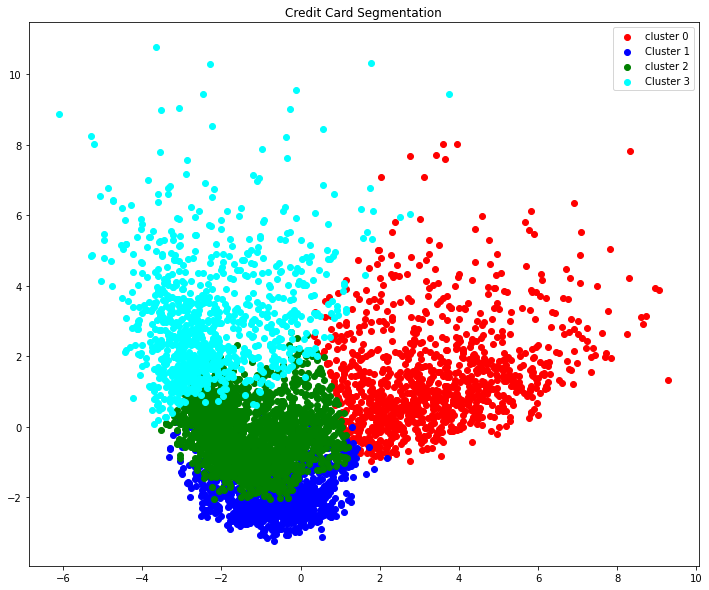

In [33]:
plt.figure(figsize=(12,10))
plt.scatter(reduced_data.loc[reduced_data['clusters'] == 0 , 'PC1'] , reduced_data.loc[reduced_data['clusters'] ==0 , 'PC2'] , c='r' , label='cluster 0')
plt.scatter(reduced_data.loc[reduced_data['clusters'] == 1 , 'PC1'] , reduced_data.loc[reduced_data['clusters'] ==1 , 'PC2'] , c='b' ,label= 'Cluster 1')
plt.scatter(reduced_data.loc[reduced_data['clusters'] == 2 , 'PC1'] , reduced_data.loc[reduced_data['clusters'] ==2 , 'PC2'] , c='g' , label='cluster 2')
plt.scatter(reduced_data.loc[reduced_data['clusters'] == 3 , 'PC1'] , reduced_data.loc[reduced_data['clusters'] ==3 , 'PC2'] , c='cyan' ,label= 'Cluster 3')
plt.title('Credit Card Segmentation')
plt.legend()
plt.show()

